**MULTILAYER PERCEPTRON**

SUBMITTED BY:

RISHIKESH S   (21BCE5304)


GAUTHAM P HARISH  (21BCE5382)

**DATASET DESCRIPTION**

This dataset is a comprehensive record of vehicle sales over a specific period, with data points collected monthly. It provides a chronological account of the number of vehicles sold, offering valuable insights into sales trends, seasonal fluctuations, and market dynamics. 

The dataset's primary purpose is to serve as a foundation for forecasting future sales using a Multilayer Perceptron (MLP), a type of artificial neural network. MLPs are known for their ability to model complex relationships and patterns in data, making them an excellent choice for this task.

The dataset's structure is straightforward, consisting of two columns: one representing the month and the other the corresponding number of vehicle sales. This simplicity allows for a clear focus on the task at hand - predicting sales for the upcoming six months.

By leveraging the historical sales data in this dataset, the MLP will be trained to understand past trends and apply this knowledge to forecast future sales. This predictive model could be a powerful tool for strategic planning, inventory management, and market analysis in the automotive industry.

In conclusion, this dataset serves as a vital link between historical sales data and future sales predictions, bridging the gap with the help of machine learning. It encapsulates the essence of data-driven decision-making in the modern business landscape.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt;
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import warnings
warnings.filterwarnings('ignore')

In [14]:
df_cars = pd.read_csv(r"C:\Users\eg1\Downloads\sales-cars 1.csv")

In [15]:
df_cars.head()

Month  Sales
0  2016-01    266
1  2016-02    146
2  2016-03    183
3  2016-04    119
4  2016-05    180

**EDA**

In [16]:
df_cars.index = pd.to_datetime(df_cars.Month, format='%Y-%m')

In [17]:
df_cars = df_cars.resample("M").sum()

In [18]:
df_cars.head()

Sales
Month            
2016-01-31    266
2016-02-29    146
2016-03-31    183
2016-04-30    119
2016-05-31    180

The sales chart is as follows.

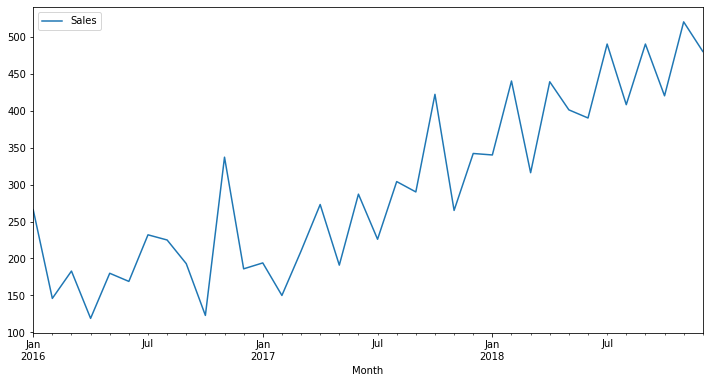

In [19]:
df_cars.plot(figsize=(12,6));

In [20]:
# Seasonal Decompose

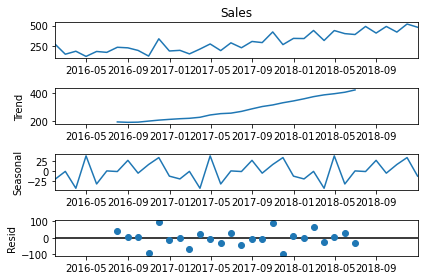

In [21]:
results = seasonal_decompose(df_cars['Sales'])
results.plot();

**We want to forecast for the next 6 months. However, we will not be able to see how successful the results we produced are, as we do not have actual sales data to compare our predicted results with. Therefore, to measure the success of the forecast, I set aside the last 6 months of the data as test data. I leave the rest as a train. We will predict the next 6 months from the train data and compare it with the real values in the test data.**

In [22]:
# Train Test Split
train = df_cars[:-6]
test = df_cars[-6:]

In [23]:
train.head()

Sales
Month            
2016-01-31    266
2016-02-29    146
2016-03-31    183
2016-04-30    119
2016-05-31    180

In [24]:
test.head()

Sales
Month            
2018-07-31    490
2018-08-31    408
2018-09-30    490
2018-10-31    420
2018-11-30    520

In [25]:
# Generate Lags

In [26]:
def generate_lag(df, n):
    X, y = [], []
    for i in range(len(df) - n):
        X.append(df[i:i+n])
        y.append(df[n+i])
    
    return np.array(X), np.array(y), np.array(y[-n:]).reshape(1,n)

In [27]:
X, y, last_batch_values = generate_lag(train.Sales.values, 12)

In [28]:
X

array([[266, 146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186],
       [146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194],
       [183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150],
       [119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210],
       [180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273],
       [169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191],
       [232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287],
       [225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226],
       [193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304],
       [123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290],
       [337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422],
       [186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265],
       [194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342],
       [150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340],
       [210, 273, 191, 287, 226, 3

In [29]:
y

array([194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340,
       440, 316, 439, 401, 390], dtype=int64)

In [30]:
last_batch_values

array([[226, 304, 290, 422, 265, 342, 340, 440, 316, 439, 401, 390]],
      dtype=int64)

In [31]:
# Build Model 

# Build the Model

In [32]:
def mlp_model(input_, y_, epochs=1000):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=input_.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    print(model.fit(input_, y_, epochs=epochs))
    return model

In [33]:
model = mlp_model(X,y, epochs=3000)
model

Epoch 1/3000
1/1 [==============================] - 1s 1s/step - loss: 119673.7109
Epoch 2/3000
1/1 [==============================] - 0s 2ms/step - loss: 105759.2266
Epoch 3/3000
1/1 [==============================] - 0s 6ms/step - loss: 92648.2812
Epoch 4/3000
1/1 [==============================] - 0s 2ms/step - loss: 80414.9453
Epoch 5/3000
1/1 [==============================] - 0s 2ms/step - loss: 69078.7188
Epoch 6/3000
1/1 [==============================] - 0s 2ms/step - loss: 58681.1797
Epoch 7/3000
1/1 [==============================] - 0s 5ms/step - loss: 49267.9727
Epoch 8/3000
1/1 [==============================] - 0s 3ms/step - loss: 40820.0664
Epoch 9/3000
1/1 [==============================] - 0s 2ms/step - loss: 33282.1680
Epoch 10/3000
1/1 [==============================] - 0s 2ms/step - loss: 26672.2715
Epoch 11/3000
1/1 [==============================] - 0s 2ms/step - loss: 20995.8828
Epoch 12/3000
1/1 [==============================] - 0s 2ms/step - loss: 16237.4102


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1514/3000
1/1 [==============================] - 0s 14ms/step - loss: 67.0485
Epoch 1515/3000
1/1 [==============================] - 0s 2ms/step - loss: 66.8383
Epoch 1516/3000
1/1 [==============================] - 0s 0s/step - loss: 66.6059
Epoch 1517/3000
1/1 [==============================] - 0s 0s/step - loss: 66.3639
Epoch 1518/3000
1/1 [==============================] - 0s 0s/step - loss: 66.1304
Epoch 1519/3000
1/1 [==============================] - 0s 0s/step - loss: 65.8890
Epoch 1520/3000
1/1 [==============================] - 0s 2ms/step - loss: 65.6798
Epoch 1521/3000
1/1 [==============================] - 0s 0s/step - loss: 65.4286
Epoch 1522/3000
1/1 [==============================] - 0s 0s/step - loss: 65.2022
Epoch 1523/3000
1/1 [==============================] - 0s 0s/step - loss: 65.0144
Epoch 1524/3000
1/1 [==============================] - 0s 0s/step - loss: 64.8107
Epoch 1525/3000
1/1 [==============================] - 0s 0s/step - loss: 64.5646
Epoch 1526/3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Forecast

In [34]:
def forecast_function(model, last_batch, n):
    in_value = last_batch.copy()
    preds = []
    for i in range(n):
        p = model.predict(in_value)
        preds.append(p.ravel())
        in_value = np.append(in_value, p)[1:].reshape(last_batch.shape)
    return np.array(preds).ravel()

In [35]:
pred = forecast_function(model, last_batch_values, 6)

1/1 [==============================] - 0s 0s/step


In [36]:
pred

array([428.00555, 517.2333 , 447.43225, 378.6286 , 494.5097 , 491.202  ],
      dtype=float32)

In [37]:
test['Predicted_Sales']=pred

In [38]:
test.head()

Sales  Predicted_Sales
Month                             
2018-07-31    490       428.005554
2018-08-31    408       517.233276
2018-09-30    490       447.432251
2018-10-31    420       378.628601
2018-11-30    520       494.509705

# Show the difference between Sales and Predicted Sales values

<Axes: xlabel='Month'>

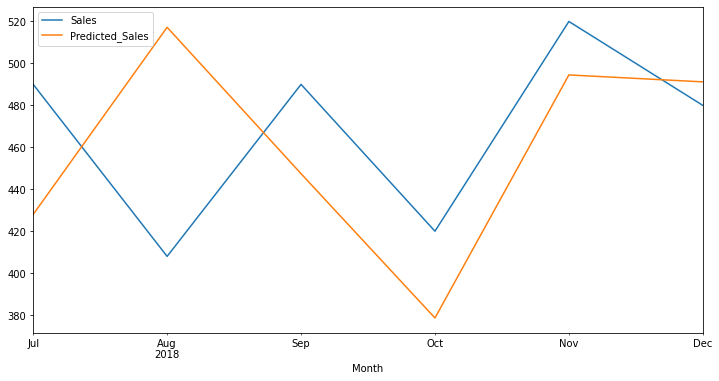

In [39]:
test.plot(figsize=(12,6))

# Calculate error line by line between sales and predicted sales as percentage in test data

In [40]:
def error_function(df,column_1,column_2):
    data = df.copy()
    my_list = []
    for i in range(len(data)):
        x = (data[column_2][i]*100)/data[column_1][i]
        if x >= 100:
            error = x-100
            #data['error_percentage'][i] = error
            my_list.append(error)
        else:
            error = 100-x
            my_list.append(error)
            #data['error_percentage'][i] = error
    data['error_percentage'] = my_list
    return data

In [41]:
column_1 = 'Sales'
column_2 = 'Predicted_Sales'
df_new = error_function(test,column_1,column_2)

In [42]:
df_new

Sales  Predicted_Sales  error_percentage
Month                                               
2018-07-31    490       428.005554         12.651928
2018-08-31    408       517.233276         26.772862
2018-09-30    490       447.432251          8.687296
2018-10-31    420       378.628601          9.850333
2018-11-30    520       494.509705          4.901980
2018-12-31    480       491.201996          2.333749

# Find the average error

In [43]:
def mean_error(df,error_column):
    total = 0
    for i in range(len(df)):
        total += df[error_column][i]
    mean_error_ = total/(len(df))
    return mean_error_

In [44]:
error_rate = mean_error(df_new,'error_percentage')

In [45]:
error_rate

10.866357897947934

**If we want see how many cars sold in reality, and how much we predicted. Then, we'll find the percentage error.**

In [46]:
sum_of_actual_sales = sum(df_new.Sales.values)

In [47]:
sum_of_actual_sales

2808

In [48]:
sum_of_predicted_sales = sum(df_new.Predicted_Sales.values)

In [49]:
sum_of_predicted_sales

2757.0113830566406

In [50]:
rate_of_actual_and_predict_sums = (sum_of_predicted_sales*100)/sum_of_actual_sales

In [51]:
if rate_of_actual_and_predict_sums >= 100:
    total_percentage = rate_of_actual_and_predict_sums - 100
else:
    total_percentage = 100-rate_of_actual_and_predict_sums

In [52]:
print('Percentage error: ',total_percentage)

Percentage error:  1.8158339367293195
